# Importing libraries

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

# Importing dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


# Data exploration

In [ ]:
print(f"train X shape: {X_train.shape}")
print(f"test X shape: {X_test.shape}")
print(f"train y shape: {y_train.shape}")
print(f"test y shape: {y_test.shape}")

train X shape: (60000, 28, 28)
test X shape: (10000, 28, 28)
train y shape: (60000,)
test y shape: (10000,)


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

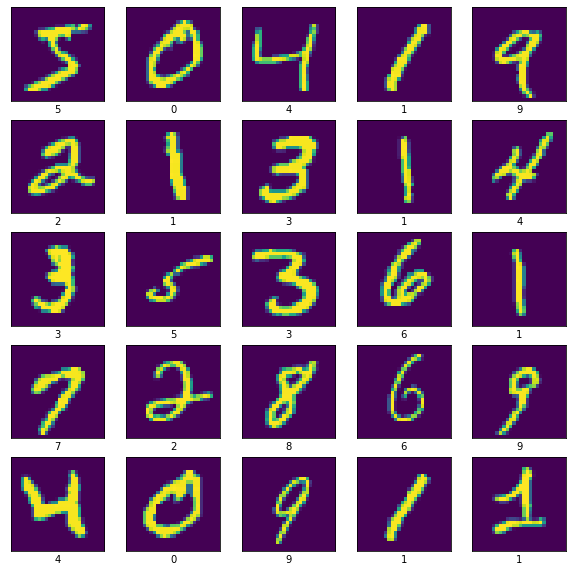

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
print('Maximum value after normalization : ',np.max(X_train))
print('Minimum value after normalization : ',np.min(X_train))

Maximum value after normalization :  1.0
Minimum value after normalization :  0.0


In [ ]:
len(X_train[0])

28

# Creating the encoder

In [ ]:
LATENT_SIZE = 32

In [ ]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

# Creating the decoder

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))

In [ ]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [ ]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")         

Training the model : Activate the GPU

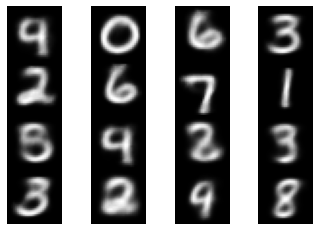

----------- EPOCH 6 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1951


In [ ]:
EPOCHS = 7
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = X_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(X_train, X_train)

# Let's test the autoencoder with the test set 

We have a matrix 4*4 containing 16 images of size 28 * 28 

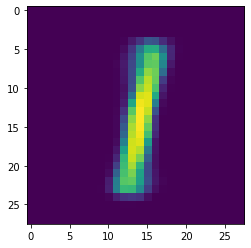

In [ ]:
alt=np . random . randint (0 , 10000 , 16)
rand = X_test [ alt ]. reshape ((4 , 4, 1,28 , 28) )
plt.imshow(model . predict ( rand [i , j ])[0])


In [ ]:
print(len(alt))

16


In [ ]:
len(X_test [ alt ]. reshape ((4 , 4, 1,28 , 28) ))

4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


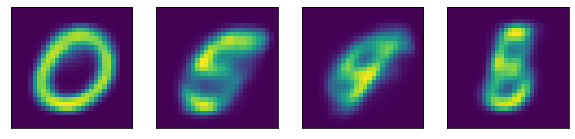

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
      plt.subplot(1,4,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      rand = X_test [ np . random . randint (0 , 10000 , 16) ]. reshape ((4 , 4, 1,28 , 28) )
      plt.imshow(model . predict ( rand [i , j ])[0])

plt.show()

# Denoising autoencoder

In [ ]:
X_train_noisy = np.clip(X_train, 0.4, 1.1) 
X_test_noisy = np.clip(X_test, 0.4, 1.1) 

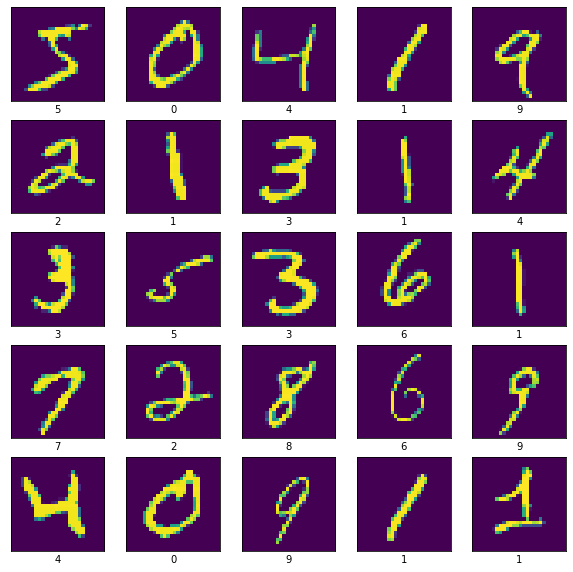

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_noisy[i])
    plt.xlabel(y_train[i])
plt.show()